**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1) Load the dataset and perform splitting into training and validation sets with 70:30 ratio.

> Do we need to normalise data? [If so Does it make any difference?]

2) Implement the K Means algorithm. You need to find the optimal number of clusters using the
    elbow method and silhouette method. 

3) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

4) Experiment with different distance measures[Euclidean distance, Manhattan distance].

5) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.

6) Report the training and the validation accuracy and Compare your trained model with a model trained by the scikit-learn

7) Visualize the dataset to depict the clusters formed. #Prefer T-SNE

8) Implement K-means++, and repeat task 1 to task 7 again.</br>
</br>
</br>
</br>
</br>
**Part 2:**
</br>
In this task, you will perform operations on `[data.csv](https://drive.google.com/file/d/15NPkfXFoTkiRBlcI4ffe_Lp_BFOyf8UY/view?usp=sharing)`, data.csv is a  latent space representation of  Fashion-MNIST, before doing this task please read about latent space representation.

9) Load the data.csv file and apply Kmeans and Kmeans++, You need to find the optimal number of clusters using the elbow method and silhouette method.

10) Visualize the dataset to depict the clusters formed. # Prefer T-SNE

11) From these experiments(Part 1 and Part 2), compare accuracy or error, and report which one is better and why?
</br>
</br>
**Note:** If the model takes a lot of time to train you can use MiniBatchKMeans.
 




# Part 1

In [183]:
import numpy as np
import sys
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

In [184]:
from sklearn.model_selection import train_test_split

trainX = trainX.astype(np.float64).reshape(-1, 28*28)
testX = testX.astype(np.float64).reshape(-1, 28*28)

print(trainX.shape)
trainX, validationX, trainy, validationy = train_test_split(trainX, trainy, test_size=0.30)

print(trainX.shape)
print(trainy.shape)
print(testX.shape)
print(testy.shape)
print(validationX.shape)
print(validationy.shape)

(60000, 784)
(42000, 784)
(42000,)
(10000, 784)
(10000,)
(18000, 784)
(18000,)


In [241]:
#implement elbow method from scratch
import matplotlib.pyplot as plt

def elbow():
    k_vals = np.arange(2,15)
    J = []
    for i in k_vals:
        Kmeans_model_temp = Kmeans(validationX,validationy)
        Kmeans_model_temp.set_k(i)
        Kmeans_model_temp.fit()
        clusters_assigned = Kmeans_model_temp.get_clusters_assigned_to_trainX()
        cost_func = 0
#         print(Kmeans_model_temp.clusters.shape)
        for k in range(i):
            indices = np.argwhere(clusters_assigned==k)
            validationX_in_cluster_k = validationX[indices].reshape(-1,784)
#             print(validationX_in_cluster_k.shape, Kmeans_model_temp.clusters.shape)
            summ = np.sum((validationX_in_cluster_k - Kmeans_model_temp.clusters[k])**2)
            cost_func += summ
        J.append(cost_func)
    J = np.array(J)
    plt.plot(k_vals,J)
    plt.xlabel("K values")
    plt.ylabel("Loss Function")

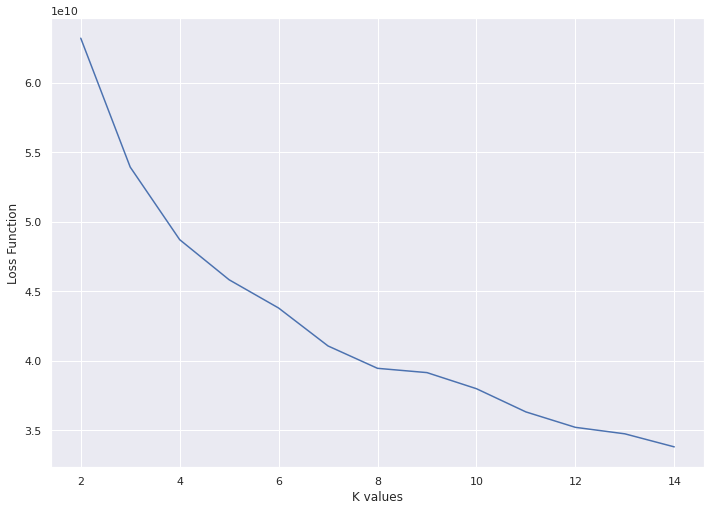

In [242]:
elbow()

In [449]:
#implement silhouette method from scratch
def silhouette():
    k_vals = np.arange(2,3)
    silhouette_scores = []
    for i in k_vals:
        Kmeans_model_temp = Kmeans(validationX,validationy)
        Kmeans_model_temp.set_k(i)
        Kmeans_model_temp.fit()
        clusters_assigned = Kmeans_model_temp.get_clusters_assigned_to_trainX()
        clusters_centroids = Kmeans_model_temp.clusters
        ans = []
        for j,row in enumerate(validationX):
            points_in_same_cluster = validationX[np.argwhere(clusters_assigned==clusters_assigned[j])].reshape(-1,784)
            print(points_in_same_cluster.shape,clusters_assigned[j])
            a = np.mean((row - points_in_same_cluster)**2)
            clusters_centroid_excluded = np.delete(clusters_centroids, (clusters_assigned[j]), axis=0)
#             nearest_cluster_centroid = 
#             return
        ans = np.array(ans)
        silhouette_scores.append(ans.mean())
        
    silhouette_scores = np.array(silhouette_scores)
    plt.plot(k_vals,silhouette_scores)
    plt.xlabel("K values")
    plt.ylabel("Silhouette Score")

In [450]:
silhouette()

(9579, 1, 784) 0


## K Means

In [420]:
#implement Kmeans from scratch
class Kmeans:
    def __init__(self,trainX,trainy):
        self.trainX = trainX
        self.trainy = trainy
    def set_k(self,k):
        self.k = k
    def predict(self,testX):
#         print(self.clusters.shape,testX.shape)
        clusters = self.clusters
        dists = -2* np.dot(clusters,testX.T) + np.sum(testX**2,axis = 1) + np.sum(clusters**2,axis = 1)[:,np.newaxis]
        min_dists = np.argmin(dists,axis=0)
        for i in range(self.k):
            min_dists[min_dists==i] = self.cluster_labels[i]
        return min_dists
    def get_clusters_assigned_to_trainX(self):
        dists = -2* np.dot(self.clusters,self.trainX.T) + np.sum(self.trainX**2,axis = 1) + np.sum(self.clusters**2,axis = 1)[:,np.newaxis]
        min_dists = np.argmin(dists,axis=0)
        return min_dists
    def fit(self, init_method = 'forgy'):
        k = self.k
        trainX = self.trainX
        if init_method == 'forgy':
            self.clusters = self.trainX[np.random.choice(range(self.trainX.shape[0]), replace = False, size = self.k), :]
        else:
            indices = np.random.choice(range(0, k), replace = True, size = self.trainX.shape[0])
            mean = []
            for count in range(self.k):
                mean.append(self.trainX[indices == count].mean(axis=0))
            self.clusters = np.concatenate([val[None, :] for val in mean], axis = 0)
        clusters = self.clusters
        max_itrs = 120
        curr_itr = 0
        while(True):
            curr_itr += 1
            if(curr_itr > max_itrs):
#                 print("Maximum Iterations Reached")
                break
#             print("Iteration #",curr_itr)
            dists = -2* np.dot(clusters,trainX.T) + np.sum(trainX**2,axis = 1) + np.sum(clusters**2,axis = 1)[:,np.newaxis]
            min_dists = np.argmin(dists,axis=0)
            new_clusters = []
            for i in range(k):
                train_indices_with_cluster_i = np.argwhere(min_dists==i)
                train_data_with_cluster_i = trainX[train_indices_with_cluster_i].reshape(-1,self.trainX.shape[1])
                new_clusters.append(np.mean(train_data_with_cluster_i,axis=0))
            new_clusters = np.array(new_clusters)
            if((new_clusters==clusters).all()):
#                 print("Converged in ",curr_itr," iterations")
                break
            clusters = new_clusters
        self.clusters = clusters
    def assign_labels_to_clusters(self):
        self.cluster_labels = np.zeros(self.k)
        dists = -2* np.dot(self.clusters,self.trainX.T) + np.sum(self.trainX**2,axis = 1) + np.sum(self.clusters**2,axis = 1)[:,np.newaxis]
        min_dists = np.argmin(dists,axis=0)
        for i in range(self.k):
            train_indices_with_cluster_i = np.argwhere(min_dists==i)
            train_lables_in_cluster_i = self.trainy[train_indices_with_cluster_i].flatten()
            self.cluster_labels[i] = np.argmax(np.bincount(train_lables_in_cluster_i))
    def visualize_clusters(self):
        from sklearn.manifold import TSNE
        import seaborn as sns
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        palette = sns.color_palette("bright", 10)
        clusters = self.clusters
        
        tsne = TSNE()
#         test_temp = self.trainX[1:10,:]
        X_embedded = tsne.fit_transform(self.trainX)
#         X_embedded = tsne.fit_transform(test_temp)
        print("Transform done!")
        dists = -2* np.dot(clusters,self.trainX.T) + np.sum(self.trainX**2,axis = 1) + np.sum(clusters**2,axis = 1)[:,np.newaxis]
#         dists = -2* np.dot(clusters,test_temp.T) + np.sum(test_temp**2,axis = 1) + np.sum(clusters**2,axis = 1)[:,np.newaxis]
        y = np.argmin(dists,axis=0)
        sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y, legend='full', palette=palette)


### **Initialization with forgy**

In [385]:
kMeansModel = Kmeans(trainX,trainy)
kMeansModel.set_k(9)
kMeansModel.fit(init_method='forgy')

Iteration # 1
Iteration # 2
Iteration # 3
Iteration # 4
Iteration # 5
Iteration # 6
Iteration # 7
Iteration # 8
Iteration # 9
Iteration # 10
Iteration # 11
Iteration # 12
Iteration # 13
Iteration # 14
Iteration # 15
Iteration # 16
Iteration # 17
Iteration # 18
Iteration # 19
Iteration # 20
Iteration # 21
Iteration # 22
Iteration # 23
Iteration # 24
Iteration # 25
Iteration # 26
Iteration # 27
Iteration # 28
Iteration # 29
Iteration # 30
Iteration # 31
Iteration # 32
Iteration # 33
Iteration # 34
Iteration # 35
Iteration # 36
Iteration # 37
Iteration # 38
Iteration # 39
Iteration # 40
Iteration # 41
Iteration # 42
Iteration # 43
Iteration # 44
Iteration # 45
Iteration # 46
Iteration # 47
Iteration # 48
Iteration # 49
Iteration # 50
Iteration # 51
Iteration # 52
Iteration # 53
Iteration # 54
Iteration # 55
Iteration # 56
Iteration # 57
Iteration # 58
Iteration # 59
Iteration # 60
Iteration # 61
Iteration # 62
Iteration # 63
Iteration # 64
Iteration # 65
Iteration # 66
Iteration # 67
Iter

In [386]:
kMeansModel.assign_labels_to_clusters()
kMeansModel.cluster_labels

array([0., 7., 2., 1., 8., 9., 3., 6., 5.])

In [387]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics.cluster import homogeneity_score

predicted_forgy = kMeansModel.predict(testX)
accuracy_forgy = (predicted_forgy == testy).mean()
conf_matrix_forgy = confusion_matrix(testy,predicted_forgy)
f1_score_forgy = f1_score(testy, predicted_forgy, average='weighted')


homogeneity_score_forgy = homogeneity_score(kMeansModel.get_clusters_assigned_to_trainX(),trainy)
print("Homogeneity Score on Train Data (Forgy)= ",homogeneity_score_forgy)

Homogeneity Score on Train Data (Forgy)=  0.5197277320634628


In [388]:
print("Other Metrics on Test data")
conf_matrix_forgy, accuracy_forgy, f1_score_forgy

Other Metrics on Test data


(array([[528,  11,  27, 101,   0,  86, 247,   0,   0,   0],
        [  2, 869,   9,  74,   0,  16,  30,   0,   0,   0],
        [  8,   3, 566,  21,   0,  53, 347,   0,   0,   2],
        [ 11, 371,  16, 401,   0,  84, 117,   0,   0,   0],
        [  0,  13, 631, 159,   0,  44, 152,   0,   0,   1],
        [  0,   0,   0,   0,   0, 689, 231,   0,   0,  80],
        [ 98,   9, 326,  97,   0, 108, 359,   0,   0,   3],
        [  0,   0,   0,   0,   0,  83, 863,   0,   0,  54],
        [  1,   1,  85,   8,   0, 497, 179,   0,   0, 229],
        [  0,   0,   2,   4,   0,  38, 106,   0,   0, 850]]),
 0.4262,
 0.3733933942598059)

### **Initialization with Random method**

In [179]:
kMeansModel.fit(init_method='random')

kMeansModel.assign_labels_to_clusters()

(14, 784)
(42000, 784)
Iteration # 1
Iteration # 2
Iteration # 3
Iteration # 4
Iteration # 5
Iteration # 6
Iteration # 7
Iteration # 8
Iteration # 9
Iteration # 10
Iteration # 11
Iteration # 12
Iteration # 13
Iteration # 14
Iteration # 15
Iteration # 16
Iteration # 17
Iteration # 18
Iteration # 19
Iteration # 20
Iteration # 21
Iteration # 22
Iteration # 23
Iteration # 24
Iteration # 25
Iteration # 26
Iteration # 27
Iteration # 28
Iteration # 29
Iteration # 30
Iteration # 31
Iteration # 32
Iteration # 33
Iteration # 34
Iteration # 35
Iteration # 36
Iteration # 37
Iteration # 38
Iteration # 39
Iteration # 40
Iteration # 41
Iteration # 42
Iteration # 43
Iteration # 44
Converged in  44  iterations


In [180]:
predicted = kMeansModel.predict(testX)
accuracy_rand = (predicted == testy).mean()
conf_matrix_rand = confusion_matrix(testy,predicted)
f1_score_rand = f1_score(testy, predicted, average='weighted')

homogeneity_score_rand = homogeneity_score(kMeansModel.get_clusters_assigned_to_trainX(),trainy)
print("Homogeneity Score on Train Data (Random)= ",homogeneity_score_rand)

conf_matrix_rand, accuracy_rand, f1_score_rand

Homogeneity Score on Train Data (Random)=  0.5083232132320611


(array([[801,   0,  24, 105,  12,   9,   0,   1,  48,   0],
        [ 92,   0,   2,  80,   8,   0,   0,   0, 818,   0],
        [119,   0, 289,  12, 251,   6,   0,   0, 323,   0],
        [251,   0,   3, 476,  14,   1,   0,   0, 255,   0],
        [ 75,   0, 178, 115, 450,   7,   0,   0, 175,   0],
        [  7,   0,   0,   0,   0, 838,   0,  93,  62,   0],
        [343,   0, 133,  93, 155,  20,   0,   0, 256,   0],
        [  0,   0,   0,   0,   0, 176,   0, 693, 131,   0],
        [ 75,   0,  59,   5,   6,  62,   0,  31, 762,   0],
        [  1,   0,   0,   2,   0,  57,   0,  27, 913,   0]]),
 0.4309,
 0.37436884076637733)

Transform done!


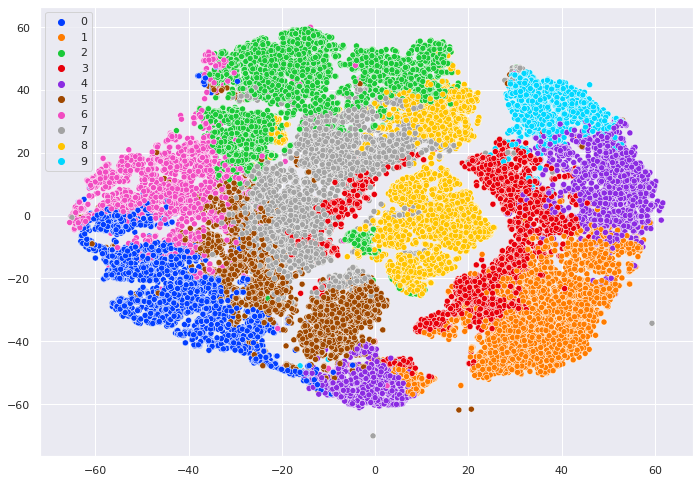

In [39]:
kMeansModel.visualize_clusters()

## K means++

In [402]:
#implement Kmeans++ from scratch
class Kmeansplusplus:
    def __init__(self,trainX,trainy):
        self.trainX = trainX
        self.trainy = trainy
    def set_k(self,k):
        self.k = k
    def predict(self,testX):
#         print(self.clusters.shape,testX.shape)
        clusters = self.clusters
        dists = -2* np.dot(clusters,testX.T) + np.sum(testX**2,axis = 1) + np.sum(clusters**2,axis = 1)[:,np.newaxis]
        min_dists = np.argmin(dists,axis=0)
        for i in range(self.k):
            min_dists[min_dists==i] = self.cluster_labels[i]
        return min_dists
    def get_clusters_assigned_to_trainX(self):
        dists = -2* np.dot(self.clusters,self.trainX.T) + np.sum(self.trainX**2,axis = 1) + np.sum(self.clusters**2,axis = 1)[:,np.newaxis]
        min_dists = np.argmin(dists,axis=0)
        return min_dists
    def initialize_clusters(self):
        from numpy import random as rd
        centroids = np.array([self.trainX[rd.randint(0,self.trainX.shape[0])]])
        for k in range(1,self.k):
            dists = []
            for x in self.trainX:
                dists.append(np.min(np.sum((x-centroids)**2)))
            prob = dists/np.sum(dists)
            cumm_prob = np.cumsum(prob)
            r=rd.random()
            for i,p in enumerate(cumm_prob):
                if r<p:
                    centroids=np.append(centroids,[self.trainX[i]],axis=0)
                    break
        return centroids
    def fit(self):
        k = self.k
        trainX = self.trainX
        clusters = self.initialize_clusters()
#         print("clusters :",clusters)
#         print(clusters[0],clusters[1])
        max_itrs = 120
        curr_itr = 0
        while(True):
            curr_itr += 1
            if(curr_itr > max_itrs):
                print("Maximum Iterations Reached")
                break
            print("Iteration #",curr_itr)
            dists = -2* np.dot(clusters,trainX.T) + np.sum(trainX**2,axis = 1) + np.sum(clusters**2,axis = 1)[:,np.newaxis]
            min_dists = np.argmin(dists,axis=0)
            new_clusters = []
            for i in range(k):
                train_indices_with_cluster_i = np.argwhere(min_dists==i)
                train_data_with_cluster_i = trainX[train_indices_with_cluster_i].reshape(-1,self.trainX.shape[1])
                new_clusters.append(np.mean(train_data_with_cluster_i,axis=0))
            new_clusters = np.array(new_clusters)
            if((new_clusters==clusters).all()):
                print("Converged in ",curr_itr," iterations")
                break
            clusters = new_clusters
        self.clusters = clusters
    def assign_labels_to_clusters(self):
        self.cluster_labels = np.zeros(self.k)
        dists = -2* np.dot(self.clusters,self.trainX.T) + np.sum(self.trainX**2,axis = 1) + np.sum(self.clusters**2,axis = 1)[:,np.newaxis]
        min_dists = np.argmin(dists,axis=0)
        for i in range(self.k):
            train_indices_with_cluster_i = np.argwhere(min_dists==i)
            train_lables_in_cluster_i = self.trainy[train_indices_with_cluster_i].flatten()
            self.cluster_labels[i] = np.argmax(np.bincount(train_lables_in_cluster_i))

 

In [389]:
kMeanspp_Model = Kmeansplusplus(trainX,trainy)
kMeanspp_Model.set_k(9)

In [390]:
kMeanspp_Model.fit()

In [391]:
predicted_pp = kMeansModel.predict(testX)
accuracy_pp = (predicted_pp == testy).mean()
conf_matrix_pp = confusion_matrix(testy,predicted_pp)
f1_score_pp = f1_score(testy, predicted_pp, average='weighted')

homogeneity_score_pp = homogeneity_score(kMeanspp_Model.get_clusters_assigned_to_trainX(),trainy)
print("Homogeneity Score on Train Data (Random)= ",homogeneity_score_pp)

conf_matrix_pp, accuracy_pp, f1_score_pp

Homogeneity Score on Train Data (Random)=  0.5199141110088622


(array([[528,  11,  27, 101,   0,  86, 247,   0,   0,   0],
        [  2, 869,   9,  74,   0,  16,  30,   0,   0,   0],
        [  8,   3, 566,  21,   0,  53, 347,   0,   0,   2],
        [ 11, 371,  16, 401,   0,  84, 117,   0,   0,   0],
        [  0,  13, 631, 159,   0,  44, 152,   0,   0,   1],
        [  0,   0,   0,   0,   0, 689, 231,   0,   0,  80],
        [ 98,   9, 326,  97,   0, 108, 359,   0,   0,   3],
        [  0,   0,   0,   0,   0,  83, 863,   0,   0,  54],
        [  1,   1,  85,   8,   0, 497, 179,   0,   0, 229],
        [  0,   0,   2,   4,   0,  38, 106,   0,   0, 850]]),
 0.4262,
 0.3733933942598059)

In [317]:
def elbow_kmeanspp():
    k_vals = np.arange(2,20)
    J = []
    for i in k_vals:
        Kmeanspp_model_temp = Kmeansplusplus(validationX,validationy)
        Kmeanspp_model_temp.set_k(i)
        Kmeanspp_model_temp.fit()
        clusters_assigned = Kmeanspp_model_temp.get_clusters_assigned_to_trainX()
        cost_func = 0
#         print(Kmeans_model_temp.clusters.shape)
        for k in range(i):
            indices = np.argwhere(clusters_assigned==k)
            validationX_in_cluster_k = validationX[indices].reshape(-1,784)
#             print(validationX_in_cluster_k.shape, Kmeans_model_temp.clusters.shape)
            summ = np.sum((validationX_in_cluster_k - Kmeanspp_model_temp.clusters[k])**2)
            cost_func += summ
        J.append(cost_func)
    J = np.array(J)
    plt.plot(k_vals,J)
    plt.xlabel("K values")
    plt.ylabel("Loss Function")

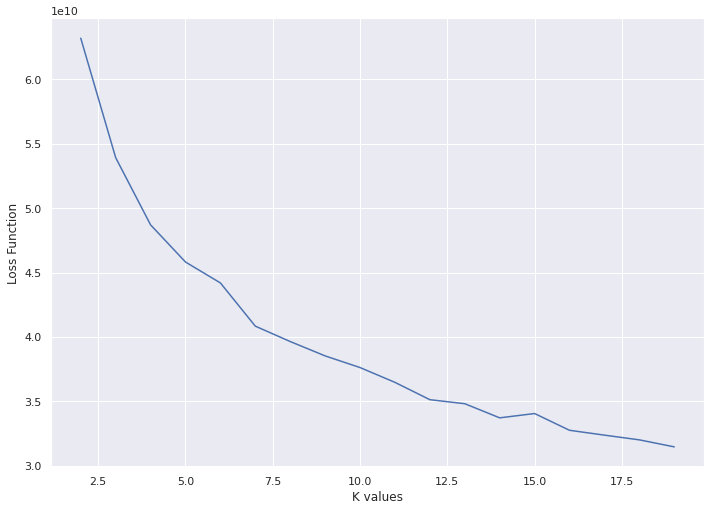

In [318]:
elbow_kmeanspp()

## **K means Sk Learn**

In [423]:
from sklearn.cluster import KMeans

kmeansSK = KMeans(n_clusters=8, random_state=0).fit(trainX)

In [429]:
predicted_SK = kmeansSK.predict(testX)

homogeneity_score_SK = homogeneity_score(predicted_SK,testy)
homogeneity_score_SK

0.5342872823814094

# Part 2

In [373]:
import pandas as pd

data = pd.read_csv('Kmeans_dataset/data.csv', header=None)

In [374]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

labels = le.fit_transform(data.iloc[:,-1])
data = data.iloc[:,1:-2].to_numpy()
labels.shape, data.shape

((60000,), (60000, 190))

In [375]:
trainX_latent, testX_latent, trainy_latent, testy_latent = train_test_split(data, labels, test_size=0.166)

trainX_latent, validationX_latent, trainy_latent, validationy_latent = train_test_split(trainX_latent, trainy_latent, test_size=0.3)

trainX_latent.shape, testX_latent.shape, validationX_latent.shape, trainy_latent.shape, testy_latent.shape, validationy_latent.shape

((35028, 190), (9960, 190), (15012, 190), (35028,), (9960,), (15012,))

### **K means with forgy initialization**

In [378]:
kMeansModel = Kmeans(trainX_latent,trainy_latent)
kMeansModel.set_k(8)
kMeansModel.fit(init_method='forgy')

Iteration # 1
Iteration # 2
Iteration # 3
Iteration # 4
Iteration # 5
Iteration # 6
Iteration # 7
Iteration # 8
Iteration # 9
Iteration # 10
Iteration # 11
Iteration # 12
Iteration # 13
Iteration # 14
Iteration # 15
Iteration # 16
Iteration # 17
Iteration # 18
Iteration # 19
Iteration # 20
Iteration # 21
Iteration # 22
Iteration # 23
Iteration # 24
Iteration # 25
Iteration # 26
Iteration # 27
Iteration # 28
Iteration # 29
Iteration # 30
Iteration # 31
Iteration # 32
Iteration # 33
Iteration # 34
Iteration # 35
Iteration # 36
Iteration # 37
Iteration # 38
Iteration # 39
Iteration # 40
Iteration # 41
Iteration # 42
Iteration # 43
Iteration # 44
Iteration # 45
Iteration # 46
Iteration # 47
Iteration # 48
Iteration # 49
Iteration # 50
Iteration # 51
Iteration # 52
Iteration # 53
Iteration # 54
Iteration # 55
Iteration # 56
Iteration # 57
Iteration # 58
Iteration # 59
Iteration # 60
Iteration # 61
Iteration # 62
Iteration # 63
Iteration # 64
Iteration # 65
Iteration # 66
Iteration # 67
Iter

In [379]:
kMeansModel.assign_labels_to_clusters()

In [384]:
predicted = kMeansModel.predict(testX_latent)
accuracy_forgy2 = (predicted == testy_latent).mean()
conf_matrix_forgy2 = confusion_matrix(testy_latent,predicted)
f1_score_forgy2 = f1_score(testy_latent, predicted, average='weighted')


homogeneity_score_forgy2 = homogeneity_score(kMeansModel.get_clusters_assigned_to_trainX(),trainy_latent)
print("Homogeneity Score on Train Data (Forgy)= ",homogeneity_score_forgy2)

conf_matrix_forgy2, accuracy_forgy2, f1_score_forgy2

Homogeneity Score on Train Data (Forgy)=  0.5084552401040157


(array([[852,   1,   0,   0,   0,  30,   0,  89,   4,   4],
        [  4, 627,  92,   0,   0,  97,   0,  24,   8, 144],
        [  0,   7, 555,   0,   0,  65,   0,   0, 155, 177],
        [  0,   0,  15,   0,   0,  98,   0,   0, 395, 525],
        [  0,  13, 528,   0,   0, 122,   0,   1,  26, 315],
        [ 46,   5,   0,   0,   0, 639,   0, 272,   1,   5],
        [  0,   4, 326,   0,   0, 200,   0,   0, 116, 331],
        [ 89,   8,   0,   0,   0, 138,   0, 784,   0,   0],
        [  0,   2,  83,   0,   0, 163,   0,   0, 440, 303],
        [  0,   0,  13,   0,   0,  51,   0,   0,  60, 908]]),
 0.482429718875502,
 0.41376567367028727)

### **K means with random initialization**

In [413]:
kMeansModel = Kmeans(trainX_latent,trainy_latent)
kMeansModel.set_k(8)
kMeansModel.fit(init_method='random')
kMeansModel.assign_labels_to_clusters()

Iteration # 1
Iteration # 2
Iteration # 3
Iteration # 4
Iteration # 5
Iteration # 6
Iteration # 7
Iteration # 8
Iteration # 9
Iteration # 10
Iteration # 11
Iteration # 12
Iteration # 13
Iteration # 14
Iteration # 15
Iteration # 16
Iteration # 17
Iteration # 18
Iteration # 19
Iteration # 20
Iteration # 21
Iteration # 22
Iteration # 23
Iteration # 24
Iteration # 25
Iteration # 26
Iteration # 27
Iteration # 28
Iteration # 29
Iteration # 30
Iteration # 31
Iteration # 32
Iteration # 33
Iteration # 34
Iteration # 35
Iteration # 36
Iteration # 37
Iteration # 38
Iteration # 39
Iteration # 40
Iteration # 41
Iteration # 42
Iteration # 43
Iteration # 44
Iteration # 45
Iteration # 46
Iteration # 47
Iteration # 48
Iteration # 49
Iteration # 50
Iteration # 51
Iteration # 52
Iteration # 53
Iteration # 54
Iteration # 55
Iteration # 56
Iteration # 57
Iteration # 58
Iteration # 59
Iteration # 60
Iteration # 61
Iteration # 62
Iteration # 63
Iteration # 64
Iteration # 65
Iteration # 66
Iteration # 67
Iter

In [414]:
predicted = kMeansModel.predict(testX_latent)
accuracy_rand2 = (predicted == testy_latent).mean()
conf_matrix_rand2 = confusion_matrix(testy_latent,predicted)
f1_score_rand2 = f1_score(testy_latent, predicted, average='weighted')


homogeneity_score_rand2 = homogeneity_score(kMeansModel.get_clusters_assigned_to_trainX(),trainy_latent)
print("Homogeneity Score on Train Data (Random)= ",homogeneity_score_rand2)

conf_matrix_rand2, accuracy_rand2, f1_score_rand2

Homogeneity Score on Train Data (Random)=  0.48818471590813844


(array([[884,   0,   0,   0,   0,   0,   0,   0,  93,   3],
        [ 74,   0,   0,   0,   0,   0,   0,   0, 919,   3],
        [ 35,   0,   0,   0,   0,   0,   0,   0, 902,  22],
        [ 30,   0,   0,   0,   0,   0,   0,   0, 404, 599],
        [ 84,   0,   0,   0,   0,   0,   0,   0, 919,   2],
        [682,   0,   0,   0,   0,   0,   0,   0, 283,   3],
        [125,   0,   0,   0,   0,   0,   0,   0, 833,  19],
        [230,   0,   0,   0,   0,   0,   0,   0, 789,   0],
        [ 93,   0,   0,   0,   0,   0,   0,   0, 836,  62],
        [ 11,   0,   0,   0,   0,   0,   0,   0, 241, 780]]),
 0.25100401606425704,
 0.14097977151994834)

### **K means++**

In [403]:
kMeanspp_Model = Kmeansplusplus(trainX_latent,trainy_latent)
kMeanspp_Model.set_k(9)

kMeanspp_Model.fit()

Iteration # 1
Iteration # 2
Iteration # 3
Iteration # 4
Iteration # 5
Iteration # 6
Iteration # 7
Iteration # 8
Iteration # 9
Iteration # 10
Iteration # 11
Iteration # 12
Iteration # 13
Iteration # 14
Iteration # 15
Iteration # 16
Iteration # 17
Iteration # 18
Iteration # 19
Iteration # 20
Iteration # 21
Iteration # 22
Iteration # 23
Iteration # 24
Iteration # 25
Iteration # 26
Iteration # 27
Iteration # 28
Iteration # 29
Iteration # 30
Iteration # 31
Iteration # 32
Iteration # 33
Iteration # 34
Iteration # 35
Iteration # 36
Iteration # 37
Iteration # 38
Iteration # 39
Iteration # 40
Iteration # 41
Iteration # 42
Iteration # 43
Iteration # 44
Iteration # 45
Iteration # 46
Iteration # 47
Iteration # 48
Iteration # 49
Iteration # 50
Iteration # 51
Iteration # 52
Iteration # 53
Iteration # 54
Iteration # 55
Iteration # 56
Iteration # 57
Iteration # 58
Iteration # 59
Iteration # 60
Iteration # 61
Iteration # 62
Iteration # 63
Iteration # 64
Iteration # 65
Iteration # 66
Iteration # 67
Iter

In [407]:
kMeanspp_Model.assign_labels_to_clusters()

predicted_pp = kMeansModel.predict(testX_latent)
accuracy_pp2 = (predicted_pp == testy_latent).mean()
conf_matrix_pp2 = confusion_matrix(testy_latent,predicted_pp)
f1_score_pp2 = f1_score(testy_latent, predicted_pp, average='weighted')

homogeneity_score_pp2 = homogeneity_score(kMeanspp_Model.get_clusters_assigned_to_trainX(),trainy_latent)
print("Homogeneity Score on Train Data (Random)= ",homogeneity_score_pp)

conf_matrix_pp2, accuracy_pp2, f1_score_pp2

Homogeneity Score on Train Data (Random)=  0.5199141110088622


(array([[854, 119,   1,   0,   0,   0,   0,   0,   2,   4],
        [  1, 872,  32,   0,   0,   0,   0,   0,  87,   4],
        [  0,  87, 680,   0,   0,   0,   0,   0, 167,  25],
        [  0, 118, 181,   0,   0,   0,   0,   0,  97, 637],
        [  0, 154, 537,   0,   0,   0,   0,   0, 311,   3],
        [ 35, 927,   0,   0,   0,   0,   0,   0,   3,   3],
        [  0, 240, 390,   0,   0,   0,   0,   0, 325,  22],
        [ 91, 928,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0, 180, 429,   0,   0,   0,   0,   0, 322,  60],
        [  0,  81,  27,   0,   0,   0,   0,   0,  26, 898]]),
 0.3640562248995984,
 0.2599752185278977)

In [421]:
def elbow2():
    k_vals = np.arange(2,15)
    J = []
    for i in k_vals:
        Kmeans_model_temp = Kmeans(validationX_latent,validationy_latent)
        Kmeans_model_temp.set_k(i)
        Kmeans_model_temp.fit()
        clusters_assigned = Kmeans_model_temp.get_clusters_assigned_to_trainX()
        cost_func = 0
#         print(Kmeans_model_temp.clusters.shape)
        for k in range(i):
            indices = np.argwhere(clusters_assigned==k)
            validationX_in_cluster_k = validationX_latent[indices].reshape(-1,190)
#             print(validationX_in_cluster_k.shape, Kmeans_model_temp.clusters.shape)
            summ = np.sum((validationX_in_cluster_k - Kmeans_model_temp.clusters[k])**2)
            cost_func += summ
        J.append(cost_func)
    J = np.array(J)
    plt.plot(k_vals,J)
    plt.xlabel("K values")
    plt.ylabel("Loss Function")
    plt.title("Elbow in Part 2")

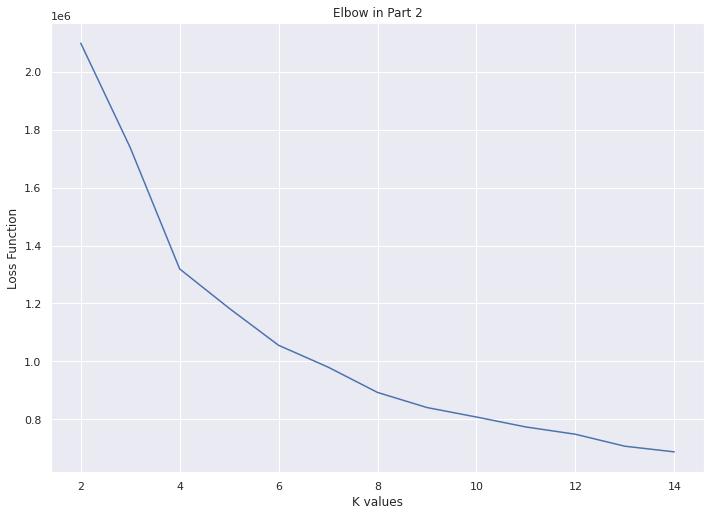

In [422]:
elbow2()

## **K means Sk Learn**

In [430]:
from sklearn.cluster import KMeans

kmeansSK = KMeans(n_clusters=8, random_state=0).fit(trainX_latent)

In [431]:
predicted_SK = kmeansSK.predict(testX_latent)

homogeneity_score_SK2 = homogeneity_score(predicted_SK,testy_latent)
homogeneity_score_SK2

0.5121098826832782

# Comparison of accuracies

In [444]:
from prettytable import PrettyTable

l = [["Homogeneity Score(1)",homogeneity_score_forgy, homogeneity_score_rand, homogeneity_score_pp, homogeneity_score_SK ],
    ["Homogeneity Score(2)",homogeneity_score_forgy2, homogeneity_score_rand2, homogeneity_score_pp2, homogeneity_score_SK2 ],
    ["Accuracy (Part 1)",accuracy_forgy, accuracy_rand, accuracy_pp, "-" ],
    ["Accuracy (Part 2)",accuracy_forgy2, accuracy_rand2, accuracy_pp2, "-" ],
    ["F1 Score (Part 1)",f1_score_forgy, f1_score_rand, accuracy_rand, "-" ],
    ["F1 Score (Part 2)",f1_score_forgy2, f1_score_rand2, f1_score_pp2, "-" ]]
# Heat map, confusion matrix
table = PrettyTable(['Metric','K Means (Forgy)', 'K Means (Random)', 'K Means++', 'SK Learn'])

for rec in l:
    table.add_row(rec)
    
print(table)

+----------------------+---------------------+---------------------+---------------------+--------------------+
|        Metric        |   K Means (Forgy)   |   K Means (Random)  |      K Means++      |      SK Learn      |
+----------------------+---------------------+---------------------+---------------------+--------------------+
| Homogeneity Score(1) |  0.5197277320634628 |  0.5083232132320611 |  0.5199141110088622 | 0.5342872823814094 |
| Homogeneity Score(2) |  0.5084552401040157 | 0.48818471590813844 | 0.48315756580524544 | 0.5121098826832782 |
|  Accuracy (Part 1)   |        0.4262       |        0.4309       |        0.4262       |         -          |
|  Accuracy (Part 2)   |  0.482429718875502  | 0.25100401606425704 |  0.3640562248995984 |         -          |
|  F1 Score (Part 1)   |  0.3733933942598059 | 0.37436884076637733 |        0.4309       |         -          |
|  F1 Score (Part 2)   | 0.41376567367028727 | 0.14097977151994834 |  0.2599752185278977 |         -    